The dataset is an ".csv" file obatained from the "https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset" . It contains the information about percentage of energy obtained from different type of food item in a country and number of peple affected by COVID-19 in that country.  

In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8e01ca4d30994b239a53c23104c881fd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ng6mKmGtGPTwjl1w-iDYC0hvQW0CDv_bM2qXoyl3oZRL',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_8e01ca4d30994b239a53c23104c881fd.get_object(Bucket='foodimpactcovid-donotdelete-pr-ckuilhhenkqwsg',Key='Food_Supply_kcal_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data = pd.read_csv(body)
df_data.head()


,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.007108,0.000223,0.000907,0.005978,38042000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,0.027817,0.001085,0.018579,0.008153,2858000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.010307,0.001067,0.004460,0.004780,43406000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.000111,0.000006,0.000035,0.000070,31427000.0,%
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,...,4.6904,1.2960,19.1,NaN,0.025773,0.003093,0.015464,0.007216,97000.0,%


Let us see the distribution of percentage of each food type in all the countries.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df_data.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
       'Vegetables', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

Lets see the distribution of each food item percentage to decide which once to keep.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed48e88be0>]],
      dtype=object)

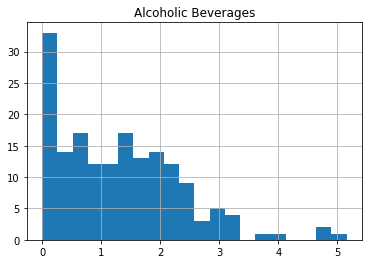

In [8]:
df_data.hist(column='Alcoholic Beverages',bins=20)

More than 60% contries have non-zero percentage, hence we keep this column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed48ae2b00>]],
      dtype=object)

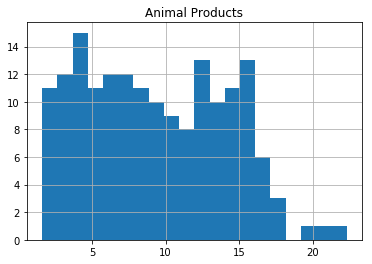

In [9]:
df_data.hist(column='Animal Products',bins=20)

The percentage is more in most of contries and hence we keep this column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed48a64b38>]],
      dtype=object)

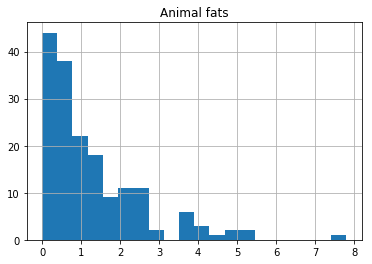

In [10]:
df_data.hist(column='Animal fats',bins=20)

Many contries have non-zero percentage and hence keep this column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed48a075f8>]],
      dtype=object)

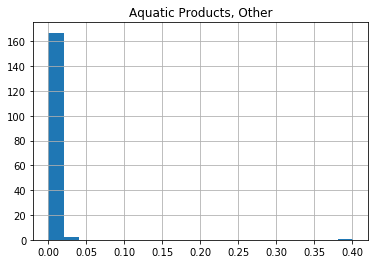

In [11]:
df_data.hist(column='Aquatic Products, Other',bins=20)

Very few countries have nono-zero percentage and hence we drop this column.

In [12]:
df_data=df_data.drop(columns=['Aquatic Products, Other'])
df_data.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood',
       'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter',
       'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed48a070f0>]],
      dtype=object)

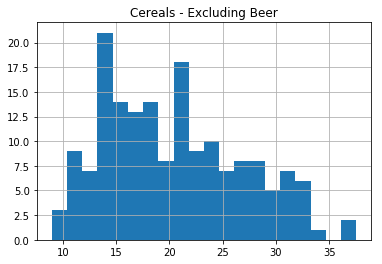

In [13]:
df_data.hist(column='Cereals - Excluding Beer',bins=20)

Most of countries have high percentage and hence keep this column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed488ab5c0>]],
      dtype=object)

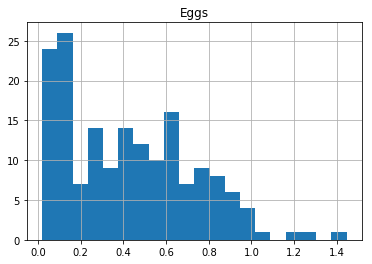

In [14]:
df_data.hist(column='Eggs',bins=20)

Most countries have non-zero percentages and hence keep this column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed48850400>]],
      dtype=object)

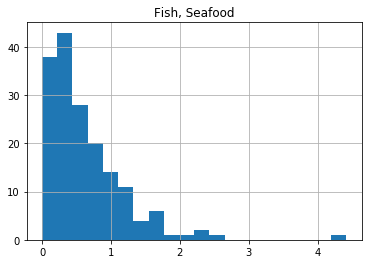

In [15]:
df_data.hist(column='Fish, Seafood',bins=20)

Most of contries have non-zero percentage and hence keep this column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed487cfb70>]],
      dtype=object)

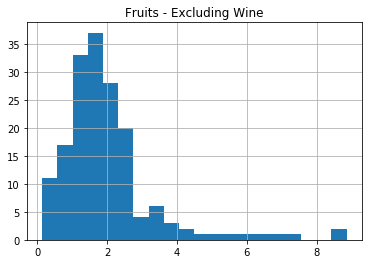

In [16]:
df_data.hist(column='Fruits - Excluding Wine',bins=20)

Most of contries have non-zero value and hence keep this column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed48759e10>]],
      dtype=object)

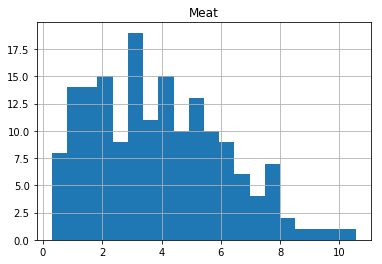

In [17]:
df_data.hist(column='Meat',bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed48741780>]],
      dtype=object)

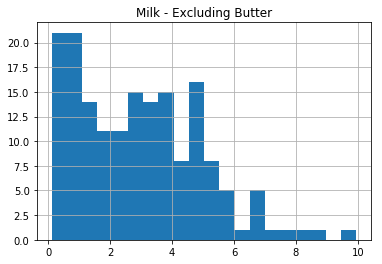

In [18]:
df_data.hist(column='Milk - Excluding Butter',bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed486066a0>]],
      dtype=object)

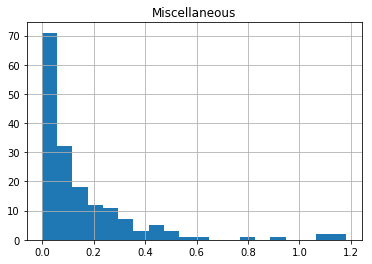

In [19]:
df_data.hist(column='Miscellaneous',bins=20)

This column doesn't give much of the information and many have zero and near-zero values and hence drop this column.

In [20]:
df_data=df_data.drop(columns=['Miscellaneous'])
df_data.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood',
       'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Offals',
       'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants',
       'Sugar Crops', 'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products',
       'Vegetable Oils', 'Vegetables', 'Obesity', 'Undernourished',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population',
       'Unit (all except Population)'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed4851f588>]],
      dtype=object)

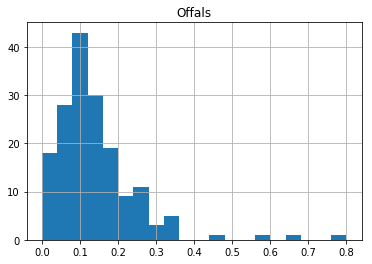

In [21]:
df_data.hist(column='Offals',bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed484af898>]],
      dtype=object)

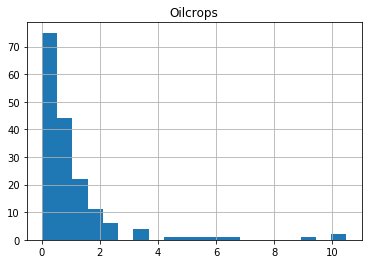

In [22]:
df_data.hist(column='Oilcrops',bins=20)

Most of the coutries have near-zero percentage and hence drop this column.

In [23]:
df_data=df_data.drop(columns=['Oilcrops'])
df_data.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood',
       'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Offals',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
       'Vegetables', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed4843da90>]],
      dtype=object)

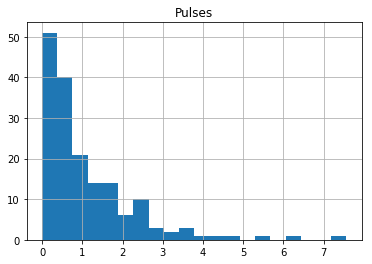

In [24]:
df_data.hist(column='Pulses',bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed483cfb38>]],
      dtype=object)

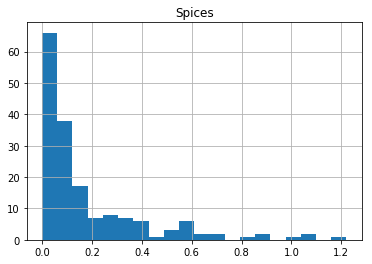

In [25]:
df_data.hist(column='Spices',bins=20)

Most of countries have near_zero values and hence drop this column.

In [26]:
df_data=df_data.drop(columns=['Spices'])
df_data.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood',
       'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Offals',
       'Pulses', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
       'Vegetables', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed482dc8d0>]],
      dtype=object)

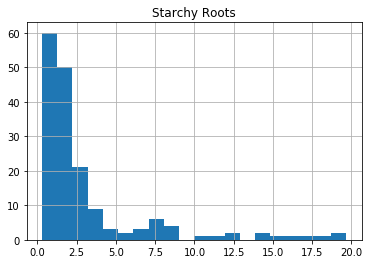

In [27]:
df_data.hist(column='Starchy Roots',bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed482ca048>]],
      dtype=object)

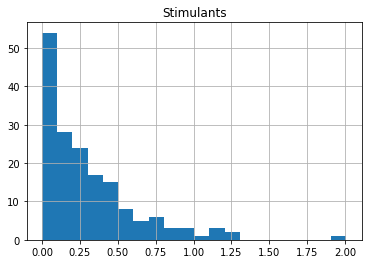

In [28]:
df_data.hist(column='Stimulants',bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed48214f98>]],
      dtype=object)

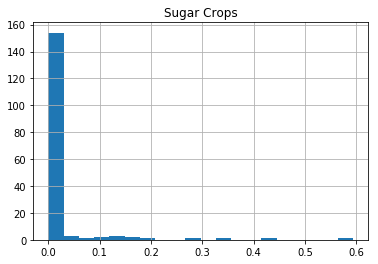

In [29]:
df_data.hist(column='Sugar Crops',bins=20)

We can drop this column as most of contries have zero value.

In [30]:
df_data=df_data.drop(columns=['Sugar Crops'])
df_data.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood',
       'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Offals',
       'Pulses', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed4812f2b0>]],
      dtype=object)

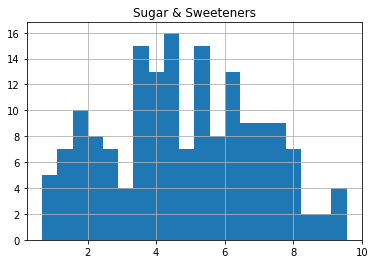

In [31]:
df_data.hist(column='Sugar & Sweeteners',bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed48108470>]],
      dtype=object)

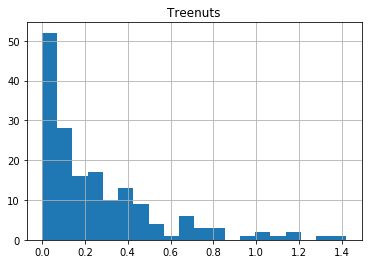

In [32]:
df_data.hist(column='Treenuts',bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed48048d68>]],
      dtype=object)

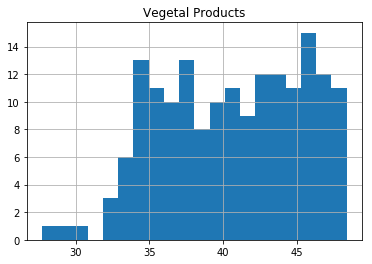

In [33]:
df_data.hist(column='Vegetal Products',bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed43fb3860>]],
      dtype=object)

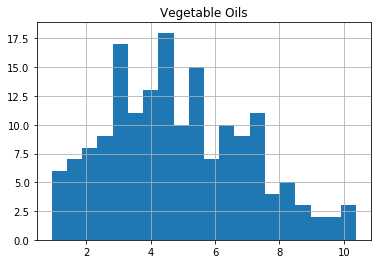

In [34]:
df_data.hist(column='Vegetable Oils',bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed43f392e8>]],
      dtype=object)

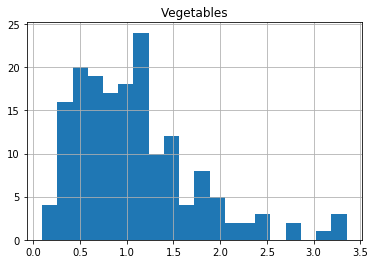

In [35]:
df_data.hist(column='Vegetables',bins=20)

We can use this dataframe for further analysis.

In [37]:
from project_lib import Project
project = Project(None,"c056f2d3-544e-4849-8506-d7043d75e9bf","p-570136fe3e84bad2e1f0be791f946d578e079b2c")

project.save_data(file_name = "df_data_exp.csv",data = df_data.to_csv(index=True))

{'file_name': 'df_data_exp.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'foodimpactcovid-donotdelete-pr-ckuilhhenkqwsg',
 'asset_id': 'bc3df42d-f5a9-4096-8825-088706b040ce'}